In [1]:
#tratamiento de datos
import pandas as pd

#configuracion de visualizacion
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#exploracion de archivos
import sys
sys.path.append('../')

#funciones personalizadas
from SRC import sp_eda as se
from SRC import sp_limpieza as sl
from SRC import sp_nulos as sn
from SRC import sp_visualizaciones as sv

In [2]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'review_creation_date']

df = pd.read_csv('../datos/df_data_no_nulos.csv', parse_dates=date_cols)
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

In [3]:
df.isnull().mean()*100

order_status                        0.000000
order_purchase_timestamp            0.000000
order_approved_at                   0.013135
order_delivered_carrier_date        1.007656
order_delivered_customer_date       2.196390
order_estimated_delivery_date       0.000000
payment_type                        0.000000
review_creation_date                0.776852
customer_zip_code_prefix            0.000000
customer_state                      0.000000
seller_state                        0.000000
product_category_name_english       0.000000
order_id                            0.000000
customer_id                         0.000000
product_id                          0.000000
seller_id                           0.000000
review_id                           0.776852
price_knn                           0.000000
freight_value_knn                   0.000000
payment_value_knn                   0.000000
product_name_length_knn             0.000000
product_description_length_knn      0.000000
product_we

# ANALISIS

## DISTRIBUCION DE COLUMNAS CATEGORICAS

### VISUALIZACION DE FRECUENCIAS

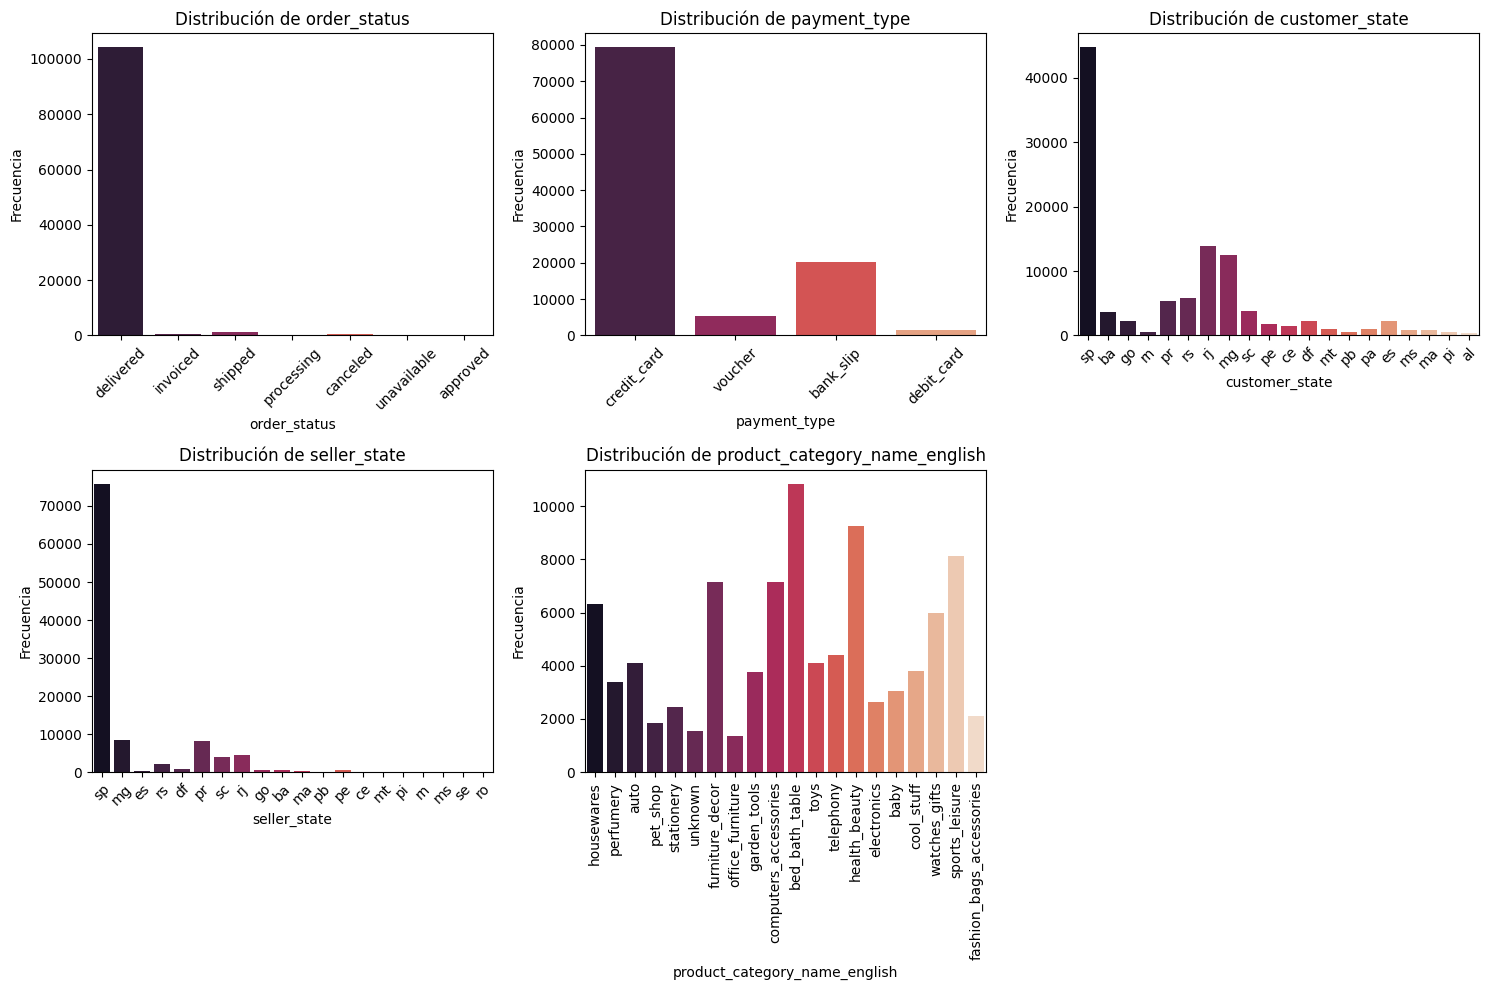

In [4]:
sv.subplot_col_cat(df,['order_id', 'customer_id', 'product_id', 'seller_id', 'review_id'])

### CALCULO DE FRECUENCIAS

In [5]:
sn.estadist_col_cat(df)

ORDER_STATUS
order_status
delivered      97.804549
shipped         1.114614
canceled        0.460670
invoiced        0.314306
processing      0.297418
unavailable     0.006568
approved        0.001876
Name: count, dtype: float64
------------------------
PAYMENT_TYPE
payment_type
credit_card    74.472716
bank_slip      19.087293
voucher         4.952901
debit_card      1.487090
Name: count, dtype: float64
------------------------
CUSTOMER_STATE
customer_state
sp    41.996923
rj    13.040419
mg    11.670607
rs     5.506455
pr     5.007318
sc     3.614051
ba     3.445170
df     2.141034
go     2.049088
es     2.046273
pe     1.646589
ce     1.335097
pa     0.971065
mt     0.932598
ma     0.740261
ms     0.713053
pb     0.539481
pi     0.500075
rn     0.493507
al     0.409067
se     0.334009
to     0.281468
ro     0.248630
am     0.146363
ac     0.079749
ap     0.067552
rr     0.044097
Name: count, dtype: float64
------------------------
SELLER_STATE
seller_state
sp    71.114801
mg     7.9

## DISTRIBUCION DE COLUMNAS NUMERICAS

### VISUALIZACION DE FRECUENCIAS

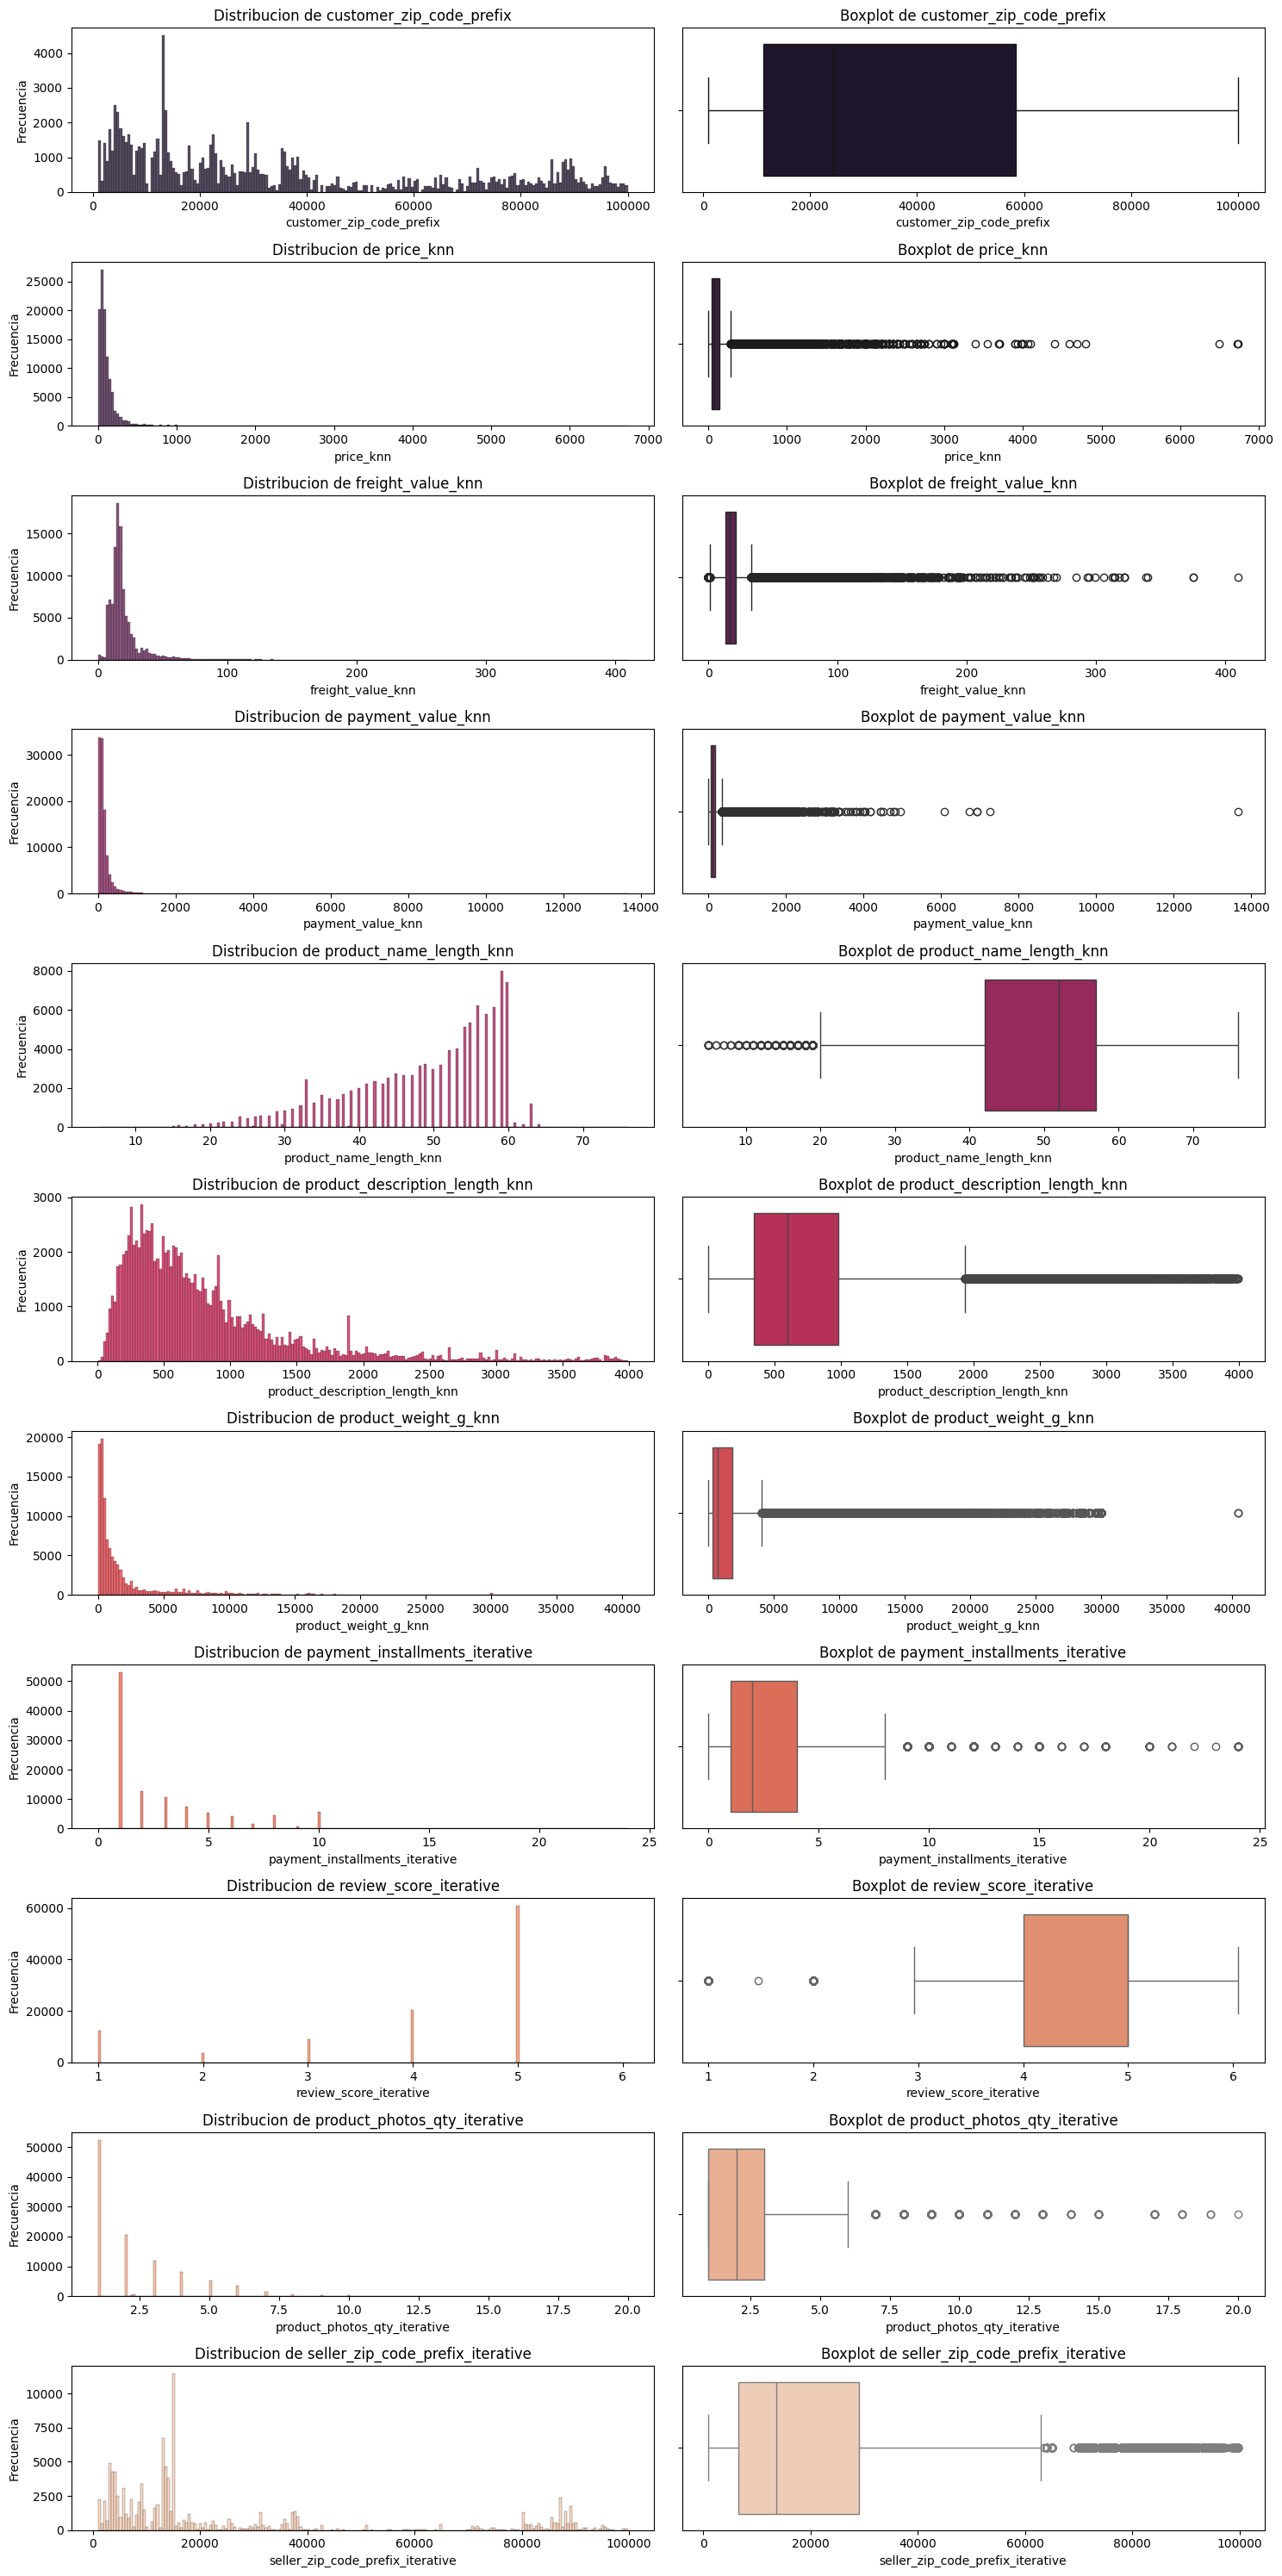

In [6]:
sv.subplot_col_num(df)

In [7]:
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,106584.0,35064.799932,29760.195037,1003.00,11333.75,24360.000,58423.0000,99990.000000
price_knn,106584.0,124.322880,189.602103,0.85,40.00,78.000,139.0000,6735.000000
freight_value_knn,106584.0,20.137443,15.904376,0.00,13.15,16.340,21.2200,409.680000
payment_value_knn,106584.0,157.899526,218.812318,0.00,58.22,102.815,176.7125,13664.080000
product_name_length_knn,106584.0,48.813944,10.002214,5.00,42.00,52.000,57.0000,76.000000
product_description_length_knn,106584.0,784.609270,648.130265,4.00,348.00,602.000,982.0000,3992.000000
product_weight_g_knn,106584.0,2102.349814,3774.160011,0.00,300.00,700.000,1800.0000,40425.000000
payment_installments_iterative,106584.0,2.909757,2.730759,0.00,1.00,2.000,4.0000,24.000000
review_score_iterative,106584.0,4.073170,1.350774,1.00,4.00,5.000,5.0000,6.047559
product_photos_qty_iterative,106584.0,2.235751,1.727229,1.00,1.00,2.000,3.0000,20.000000


In [8]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['customer_zip_code_prefix', 'price_knn', 'freight_value_knn',
       'payment_value_knn', 'product_name_length_knn',
       'product_description_length_knn', 'product_weight_g_knn',
       'payment_installments_iterative', 'review_score_iterative',
       'product_photos_qty_iterative', 'seller_zip_code_prefix_iterative'],
      dtype='object')

## Outliers

In [9]:
sn.calculo_outliers(df,df.select_dtypes(include=['int64', 'float64']).columns)

En la columna CUSTOMER_ZIP_CODE_PREFIX tenenemos un total de 0 outliers, lo que representa un 0.0% del total
En la columna PRICE_KNN tenenemos un total de 7998 outliers, lo que representa un 7.5039405539292945% del total
En la columna FREIGHT_VALUE_KNN tenenemos un total de 11596 outliers, lo que representa un 10.879681753358852% del total
En la columna PAYMENT_VALUE_KNN tenenemos un total de 8190 outliers, lo que representa un 7.684080162125648% del total
En la columna PRODUCT_NAME_LENGTH_KNN tenenemos un total de 709 outliers, lo que representa un 0.6652030323500713% del total
En la columna PRODUCT_DESCRIPTION_LENGTH_KNN tenenemos un total de 6638 outliers, lo que representa un 6.227951662538468% del total
En la columna PRODUCT_WEIGHT_G_KNN tenenemos un total de 15067 outliers, lo que representa un 14.13626810778353% del total
En la columna PAYMENT_INSTALLMENTS_ITERATIVE tenenemos un total de 6839 outliers, lo que representa un 6.416535314869024% del total
En la columna REVIEW_SCORE_

## Matriz de correlación

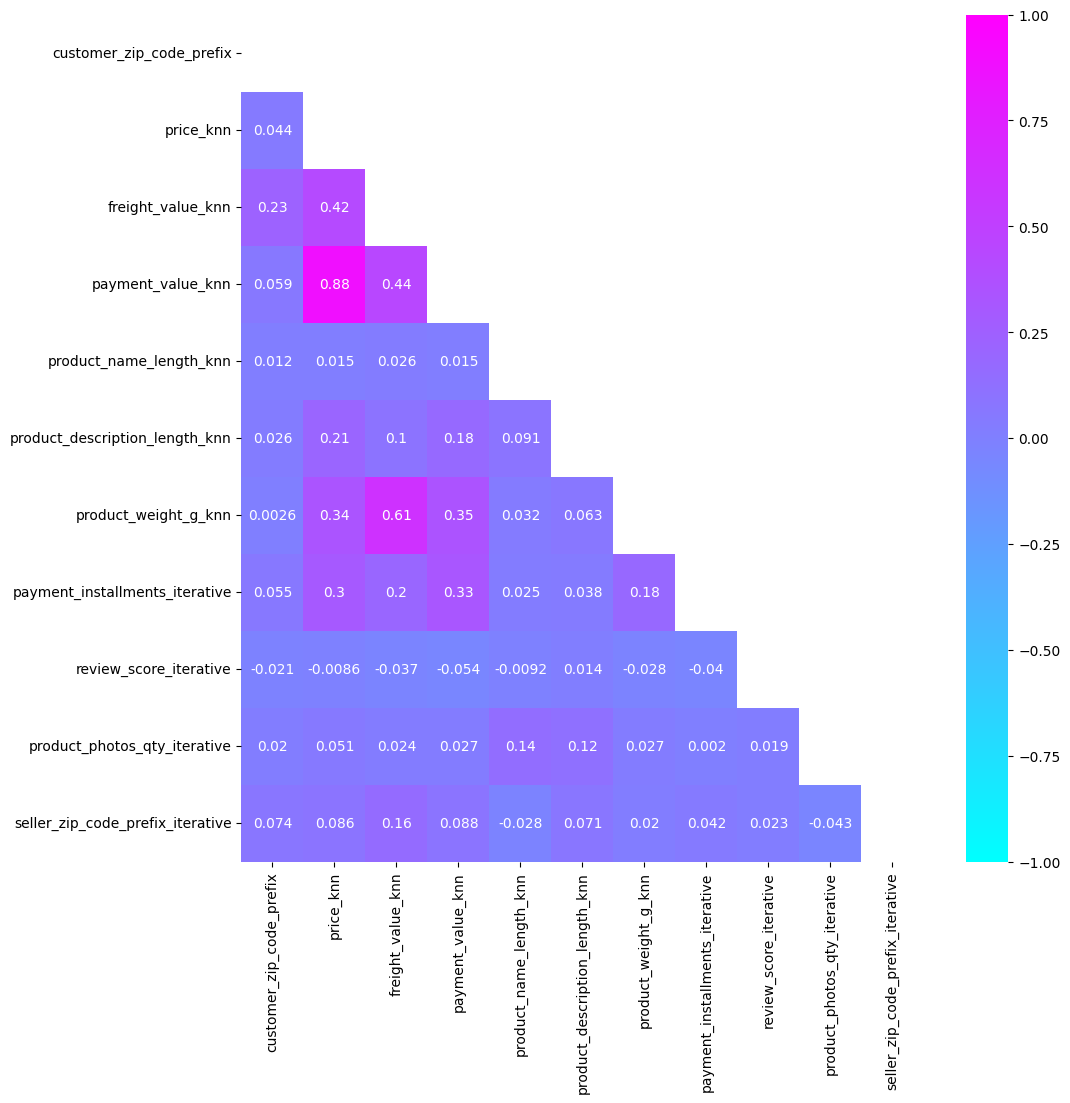

In [10]:
sv.matriz_correlacion(df)